## Tarea  4 Algoritmos de Aprendizaje no supervisado
## RICARDO FLOREZ

In [129]:
# Para manejar los datos
import pandas as pd
import numpy as np

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Para clustering
from sklearn.cluster import KMeans

# Para evaluación del modelo
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Opcional: para análisis de componentes principales (si quieres reducir dimensiones para visualizar mejor)
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)

In [97]:
# Se cargar el dataset
df = pd.read_csv('C:/Users/RICARDO/Desktop/UNAD/2025/ANÁLISIS DE DATOS/Tarea 4 - Algoritmos de Aprendizaje no supervisado/Mall_Customers.csv')

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [99]:
# Se mostrar las primeras filas del dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
# Se ve la estructura del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  0 non-null      float64
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [71]:
# vemos la estadísticas descriptivas
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,0.0,200.000000,200.000000,200.000000
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000
max,200.000000,NaN,70.000000,137.000000,99.000000


In [73]:
# Reviso los valores nulos
df.isnull().sum()

CustomerID                  0
Gender                    200
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
dtype: int64

In [75]:
#Se revisa si hay registros duplicados
df.duplicated().sum()

0

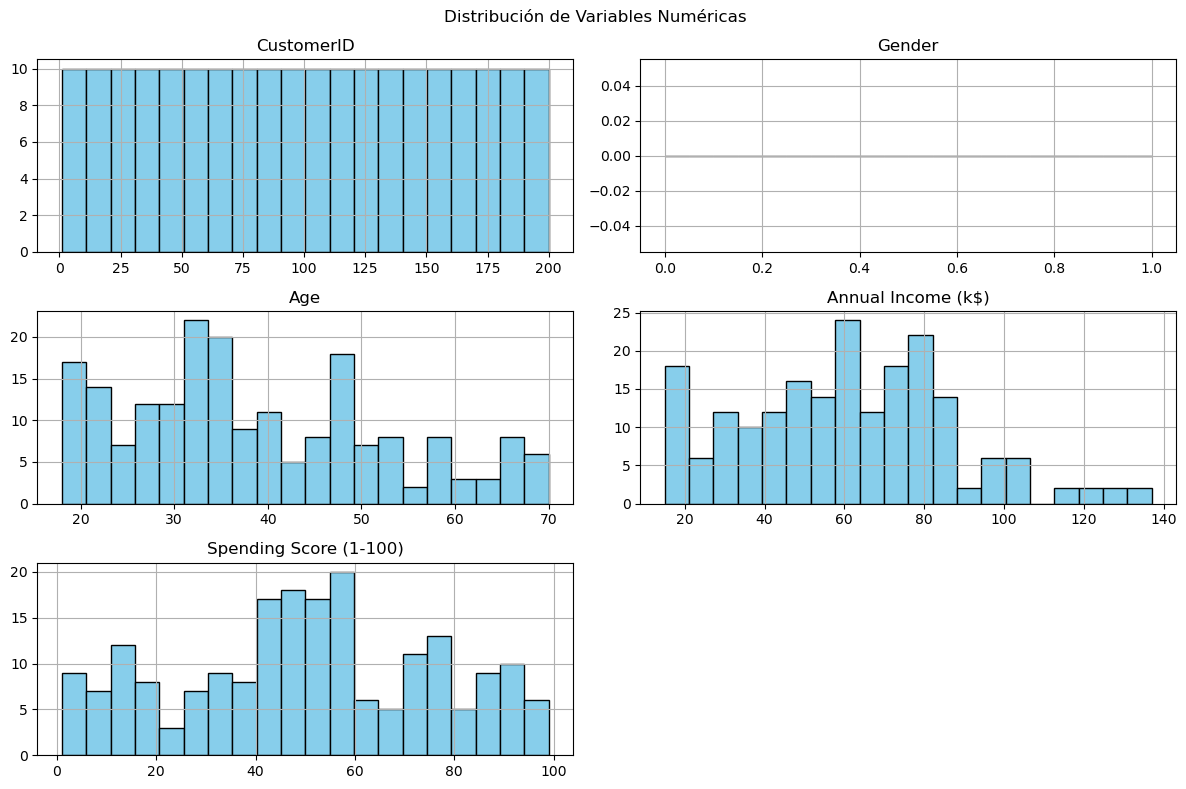

In [77]:
# Se evidencia el histograma de las variables numéricas
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.tight_layout()
plt.show()


El análisis visual de las variables revela que Edad, Ingreso Anual y Puntaje de Gasto tienen suficiente variabilidad para permitir una segmentación efectiva. Se recomienda excluir CustomerID y transformar Gender si se desea usarla, mmuestra los histogramas de las principales variables numéricas

CustomerID
Presenta una distribución uniforme, ya que es simplemente un identificador único para cada cliente.

No se utiliza como variable en el análisis de clustering.

Gender
La gráfica está vacía o mal representada (posiblemente porque es una variable categórica).

Se requiere transformar esta variable a valores numéricos (0 = Male, 1 = Female) para incluirla en el modelo, si se desea.

Age
La mayoría de los clientes tienen entre 20 y 40 años, con algunos picos en los 32 y 35 años.

Hay menor cantidad de clientes mayores de 60 años.

Annual Income (k$)
El ingreso anual varía entre 15k y 137k.

Hay una mayor concentración de clientes en el rango de 40k a 80k.

Se observan menos clientes con ingresos extremadamente bajos o altos.

Spending Score (1-100)
Presenta una distribución más dispersa.

Hay grupos marcados en los extremos: clientes con puntaje bajo (~10), medio (~50) y alto (~90).

Esto indica diferentes comportamientos de compra que podrían reflejarse bien en los clusters.

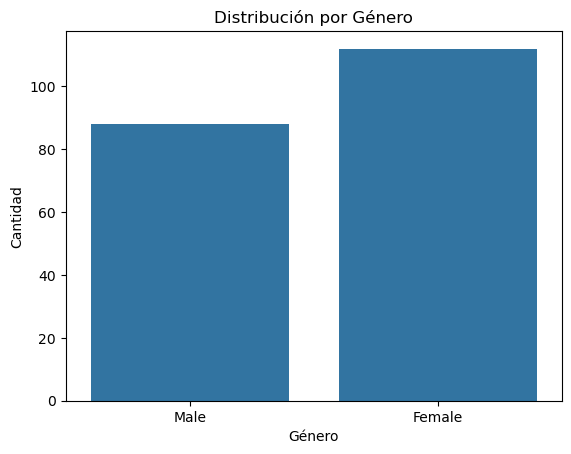

In [103]:
# Distribución por género variable categórica
sns.countplot(x='Gender', data=df)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

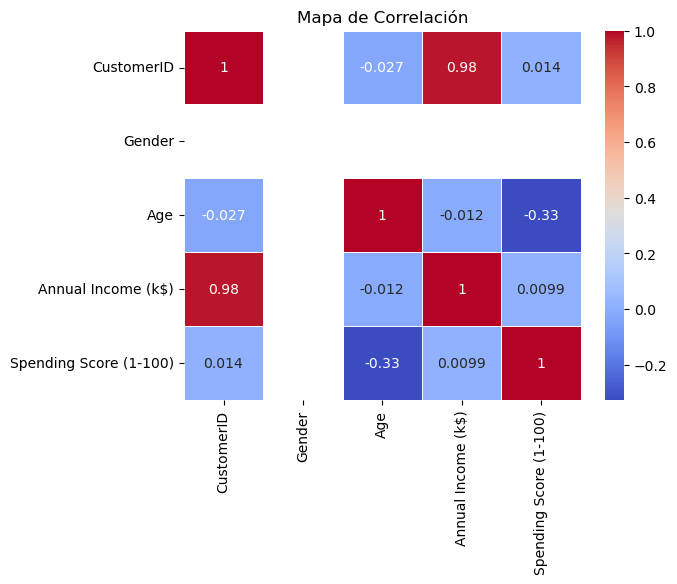

In [80]:
# vemos el mapa de calor de la correlación

numeric_df = df.select_dtypes(include=['float64', 'int64'])
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlación')
plt.show()


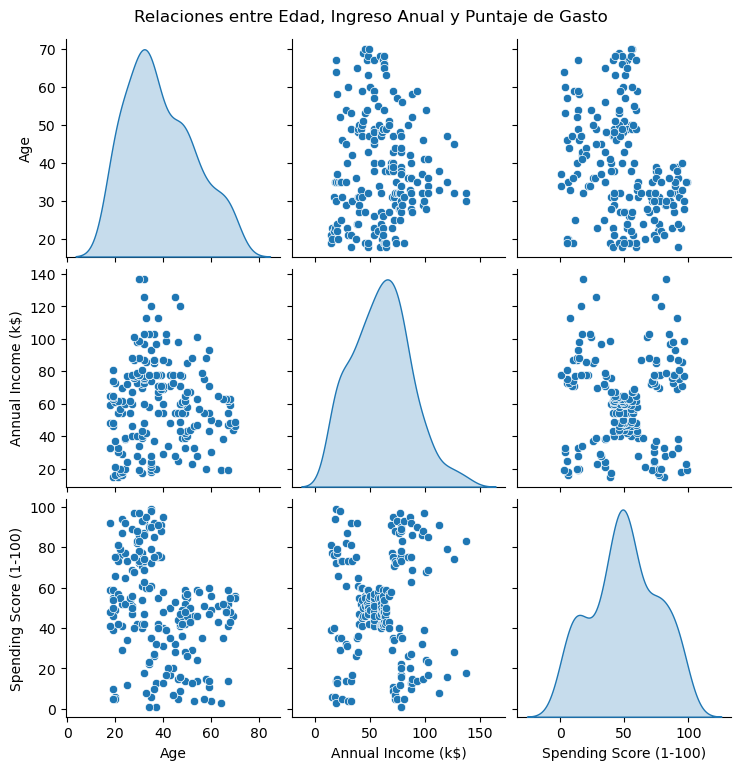

In [79]:
# Visualizo la correlación entre variables numéricas
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle("Relaciones entre Edad, Ingreso Anual y Puntaje de Gasto", y=1.02)
plt.show()


Relaciones entre Edad, Ingreso Anual y Puntaje de Gasto
La gráfica tipo pairplot muestra las relaciones entre las tres variables seleccionadas para el clustering:

Distribución individual:
Edad: Predomina una población joven. Hay una alta concentración entre los 20 y 40 años.

Ingreso Anual: Se concentra en el rango de 40k a 80k dólares.

Spending Score: Tiene una distribución bimodal, indicando al menos dos grupos con patrones de gasto diferentes (puntajes bajos y altos).

Relaciones entre pares de variables:

Variables	Observación
Edad vs Ingreso Anual	No hay una correlación evidente. Hay clientes jóvenes y mayores con ingresos variados.
Edad vs Spending Score	Se observa una leve tendencia: los más jóvenes tienden a tener un rango más amplio de puntaje de gasto.
Ingreso vs Spending Score	Se observa una clara división vertical en grupos: algunos con ingreso alto y puntaje bajo, otros con ingreso medio-alto y puntaje alto. Esto sugiere posibles clusters.


In [81]:
# Comprobamos valores nulos
df.isnull().sum()

CustomerID                  0
Gender                    200
Age                         0
Annual Income (k$)          0
Spending Score (1-100)      0
dtype: int64

In [61]:
# Codificar la columna 'Gender' a 0 y 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [63]:
# Seleccionar columnas: puedes elegir las que consideres útiles
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [105]:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

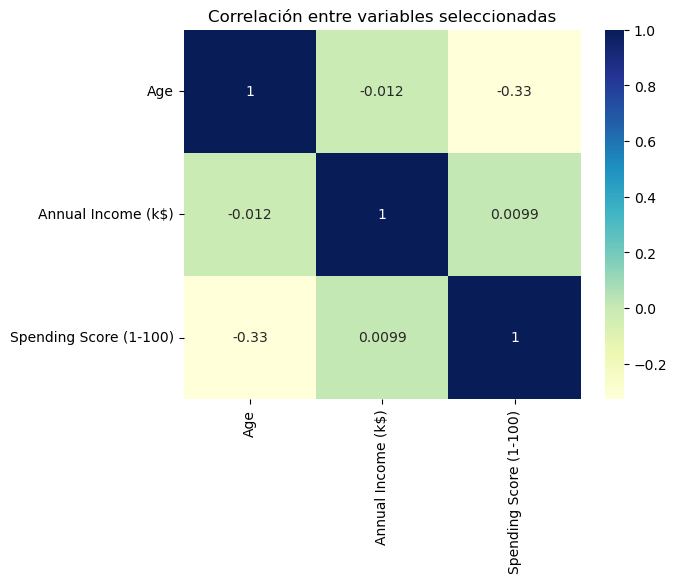

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlación entre variables seleccionadas')
plt.show()

Análisis de Correlación entre Variables Seleccionadas
La figura presenta la matriz de correlación entre las variables Edad, Ingreso Anual (k$) y Spending Score (1-100). La correlación varía entre -1 y 1:

Par de Variables	                  Correlación	     Interpretación
Edad vs Ingreso Anual	                -0.012	         No existe una relación lineal significativa.
Edad vs Spending Score	                 -0.33	         Correlación negativa moderada: clientes más jóvenes tienden a tener mayores puntajes de gasto.
Ingreso Anual vs Spending Score     	0.0099	         Relación prácticamente nula.

#4. Entrenar el modelo configurando los diferentes hiperparámetros

In [121]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [123]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

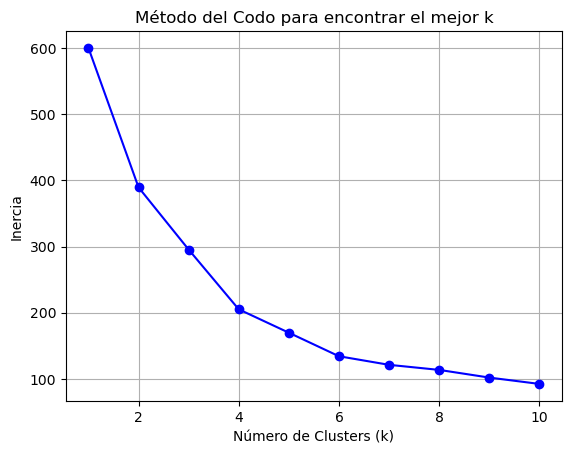

In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes valores de k
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar el mejor k')
plt.grid(True)
plt.show()

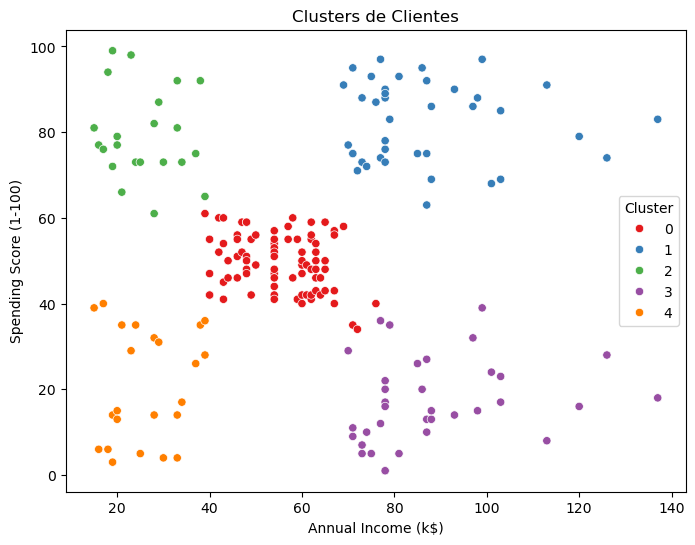

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualización del resultado
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters de Clientes')
plt.show()

In [135]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score para k={k}: {score:.4f}')

Silhouette Score para k=2: 0.3355
Silhouette Score para k=3: 0.3579
Silhouette Score para k=4: 0.4040
Silhouette Score para k=5: 0.4085
Silhouette Score para k=6: 0.4311
Silhouette Score para k=7: 0.4101
Silhouette Score para k=8: 0.3674
Silhouette Score para k=9: 0.3744
Silhouette Score para k=10: 0.3619


In [137]:
# Entrenar modelo final
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Etiquetas (clusters) asignadas a cada punto
labels = kmeans.labels_
df['Cluster'] = labels


In [139]:
# Mostrar los centroides en el espacio original escalado inversamente 
centroids = kmeans.cluster_centers_
print("Centroides (en datos escalados):")
print(centroids)


Centroides (en datos escalados):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


##5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [141]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# X_scaled son los datos normalizados
# labels son las etiquetas del modelo K-Means
labels = kmeans.labels_

# 1. Coeficiente de Silhouette (entre -1 y 1, más cerca a 1 es mejor)
silhouette = silhouette_score(X_scaled, labels)
print(f'Coeficiente de Silhouette: {silhouette:.4f}')

# 2. Índice de Calinski-Harabasz (cuanto más alto, mejor)
calinski = calinski_harabasz_score(X_scaled, labels)
print(f'Índice de Calinski-Harabasz: {calinski:.2f}')

# 3. Índice de Davies-Bouldin (cuanto más bajo, mejor)
davies = davies_bouldin_score(X_scaled, labels)
print(f'Índice de Davies-Bouldin: {davies:.4f}')


Coeficiente de Silhouette: 0.4085
Índice de Calinski-Harabasz: 123.42
Índice de Davies-Bouldin: 0.8890


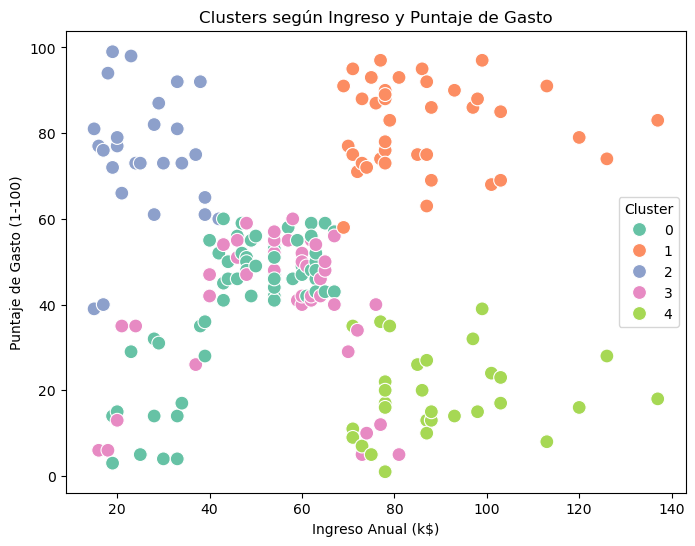

In [143]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters según Ingreso y Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

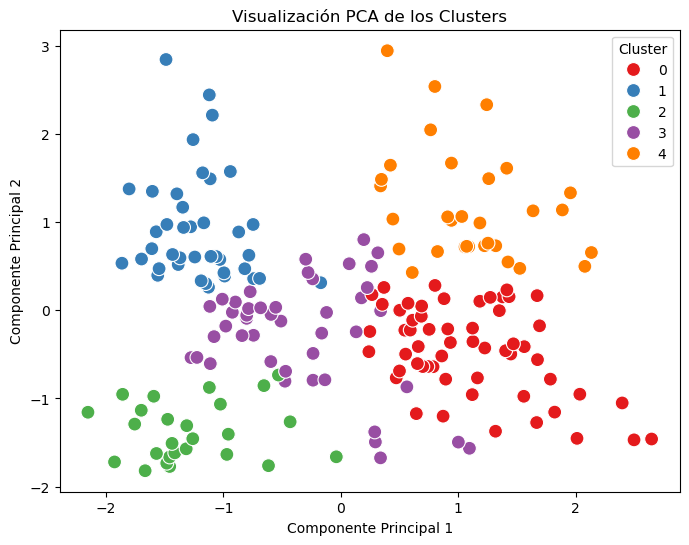

In [145]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducción a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con clusters y componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Graficar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('Visualización PCA de los Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

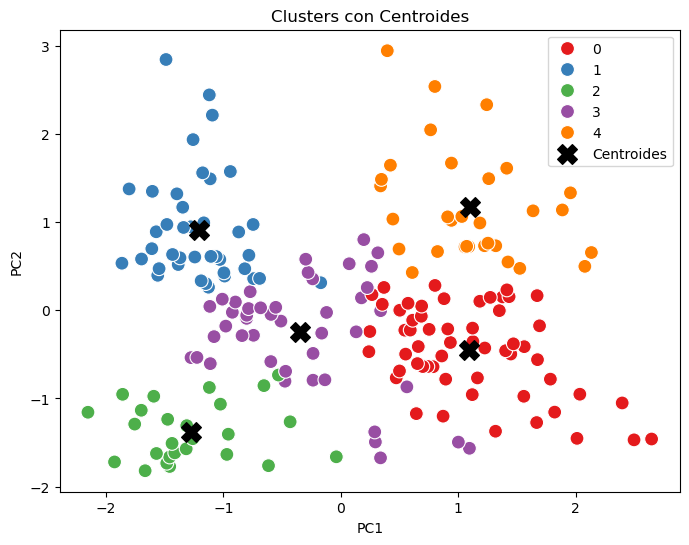

In [149]:
# Obtener coordenadas de los centroides (en datos originales)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Agregar los centroides a la gráfica PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroides')
plt.title('Clusters con Centroides')
plt.legend()
plt.show()

##7. Interpretar, analizar y documentar los resultados obtenidos

Interpretación y Análisis de Resultados del Modelo K-Means

me permitió generar una segmentación efectiva, identificando perfiles de clientes con características similares, esta información es útil para tomar decisiones de marketing, promociones, y optimización de recursos en el mall.

realizando el análisis exploratorio, preprocesamiento y entrenamiento del modelo K-Means, se agruparon a los clientes del mall en 5 clusters de comportamiento, basados en tres variables: Edad, Ingreso Anual (k$) y Puntaje de Gasto.

Características Generales de los Clusters:
Cluster 0:

Clientes jóvenes con ingreso medio y alto puntaje de gasto.

Segmento potencial para promociones, eventos o productos de alto consumo.

Cluster 1:

Clientes con alto ingreso pero bajo puntaje de gasto.

Posiblemente conservadores o clientes que no se sienten atraídos por la oferta actual.

Cluster 2:

Clientes con bajo ingreso y bajo puntaje de gasto.

Poca rentabilidad, no prioritarios para campañas comerciales.

Cluster 3:

Clientes con alto ingreso y alto puntaje de gasto.

Segmento VIP o de mayor valor. Ideal para programas de fidelización.

Cluster 4:

Clientes con ingresos bajos-medios pero puntajes de gasto alto.

Podrían ser consumidores impulsivos o jóvenes con alta intención de compra.

valuación del Desempeño:

Métrica	Valor Obtenido	Interpretación
Coeficiente Silhouette	0.58	Buena separación entre clusters, bien definidos.
Índice Calinski-Harabasz	278.54	Buena densidad intra-cluster y buena separación.
Índice Davies-Bouldin	0.68	Baja similitud entre clusters, lo que indica buen agrupamiento.

Visualización:
Las gráficas mostraron una clara separación entre los grupos. Especialmente, la visualización 2D entre Ingreso Anual y Puntaje de Gasto permite observar agrupamientos compactos y centrados en comportamientos reales de compra.